# 📰 Keyword-Based News Classification

This notebook demonstrates a **basic keyword-based classification** of news articles into categories.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
import random

RANDOM_SEED = 42

## Load dataset

In [2]:

df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


## Clean the dataset

In [3]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [4]:
# Keep only selected categories
categories = ['POLITICS', 'TRAVEL', 'SPORTS', 'HOME & LIVING']
df = df[df['category'].isin(categories)]

# Keep only short_description and category
df = df[['short_description', 'category']]
df.head()

,short_description,category
17,"Maury Wills, who helped the Los Angeles Dodger...",SPORTS
21,President issues vow as tensions with China rise.,POLITICS
24,An annual celebration took on a different feel...,POLITICS
26,Las Vegas never had a professional sports cham...,SPORTS
30,"U.S. President Joe Biden, in London for the fu...",POLITICS


In [7]:
# Drop rows with missing short_description
df = df.dropna(subset=['short_description'])

# Balance dataset: 1000 samples per category
balanced_df = df.groupby('category').apply(lambda x: x.sample(1000, random_state=RANDOM_SEED)).reset_index(drop=True)
print(balanced_df['category'].value_counts())

category
HOME & LIVING    1000
POLITICS         1000
SPORTS           1000
TRAVEL           1000
Name: count, dtype: int64


C:\Users\bbuser\AppData\Local\Temp\ipykernel_6732\1152438619.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('category').apply(lambda x: x.sample(1000, random_state=RANDOM_SEED)).reset_index(drop=True)


In [8]:
# Train/Test Split (Stratified Train(80)/Test(20))
train_df, test_df = train_test_split(
    balanced_df, 
    test_size=0.2, 
    stratify=balanced_df['category'], 
    random_state=RANDOM_SEED
)
print('Train:', train_df.shape, 'Test:', test_df.shape)

Train: (3200, 2) Test: (800, 2)


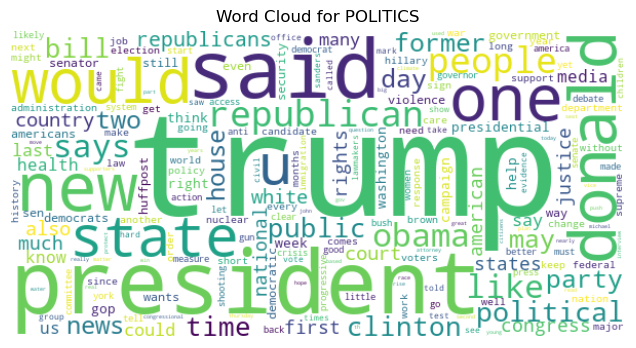

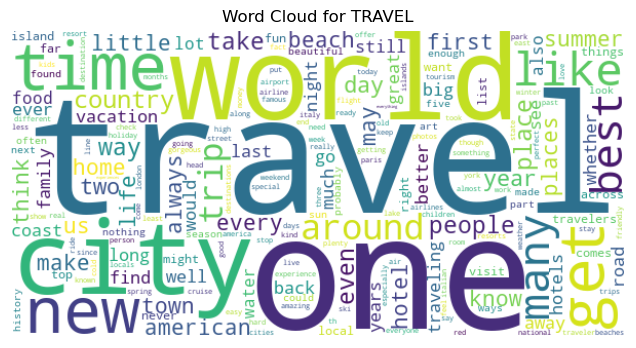

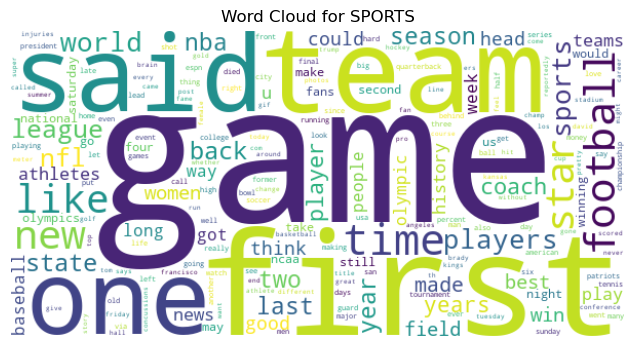

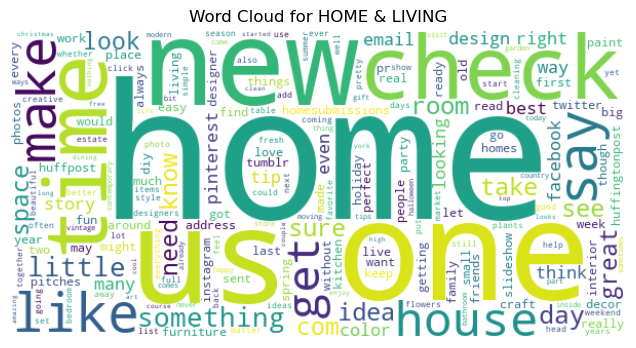


Category: POLITICS
Top 10 words: ['trump', 'president', 'said', 'new', 'donald', 'one', 'would', 'state', 'u', 'republican']
Top 20 words: ['trump', 'president', 'said', 'new', 'donald', 'one', 'would', 'state', 'u', 'republican', 'people', 'like', 'obama', 'says', 'political', 'clinton', 'time', 'public', 'bill', 'may']
Top 30 words: ['trump', 'president', 'said', 'new', 'donald', 'one', 'would', 'state', 'u', 'republican', 'people', 'like', 'obama', 'says', 'political', 'clinton', 'time', 'public', 'bill', 'may', 'former', 'two', 'party', 'day', 'news', 'house', 'republicans', 'also', 'white', 'country']
Top 40 words: ['trump', 'president', 'said', 'new', 'donald', 'one', 'would', 'state', 'u', 'republican', 'people', 'like', 'obama', 'says', 'political', 'clinton', 'time', 'public', 'bill', 'may', 'former', 'two', 'party', 'day', 'news', 'house', 'republicans', 'also', 'white', 'country', 'court', 'states', 'first', 'much', 'congress', 'justice', 'american', 'rights', 'national', '

In [10]:
from nltk.corpus import stopwords
from collections import defaultdict, Counter
from wordcloud import WordCloud

# to find the world cloud 

# Define stopwords once
stop_words = set(stopwords.words("english"))

# Alternative clean function: use regex findall instead of split
def clean_text(text):
    text = text.lower()
    words = re.findall(r"[a-z]+", text)  # extract only alphabetic words
    return [w for w in words if w not in stop_words]

# Dictionaries to hold results
category_word_counts = {}
category_wordclouds = {}
top_words_per_category = {}

# Process each category
for cat in categories:
    texts = train_df.loc[train_df["category"] == cat, "short_description"]
    
    # Flatten all words using list comprehension
    all_words = [word for desc in texts for word in clean_text(desc)]
    
    # Count words
    counter = Counter(all_words)
    category_word_counts[cat] = counter
    
    # Wordcloud generation
    wc = WordCloud(width=600, height=300, background_color="white").generate_from_frequencies(counter)
    category_wordclouds[cat] = wc
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {cat}")
    plt.show()
    
    # Store top 100 frequent words
    top_words_per_category[cat] = [w for w, _ in counter.most_common(100)]

# Define the cutoffs you want
cutoffs = [10, 20, 30, 40, 50]

for cat in categories:
    print(f"\nCategory: {cat}")
    for n in cutoffs:
        top_n_words = top_words_per_category[cat][:n]
        print(f"Top {n} words: {top_n_words}")


In [11]:
# clean the text:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

In [14]:
#Keyword-based Classification Function
def classify_keywords(desc, word_sets):
    words = set(clean_text(desc))
    overlaps = {cat: len(words & set(word_sets[cat])) for cat in categories}
    max_overlap = max(overlaps.values())
    if list(overlaps.values()).count(max_overlap) > 1:
        # Tie: assign 'unknown' or choose random among tied
        tied = [cat for cat, v in overlaps.items() if v == max_overlap]
        return random.choice(tied)
    else:
        return max(overlaps, key=overlaps.get)

In [15]:
# Experiment: Varying Top-N Words
results = []
Ns = [10, 20, 30, 50, 70, 100]

for N in Ns:
    word_sets = {cat: set(top_words_per_category[cat][:N]) for cat in categories}
    preds = test_df['short_description'].apply(lambda x: classify_keywords(x, word_sets))
    acc = np.mean(preds == test_df['category'])
    results.append((N, acc))
    print(f"Top {N} words: Accuracy = {acc:.3f}")
    
# Detailed analysis per category
    
    if N == max(Ns):
        test_df['pred'] = preds
        print('\nClassification report (Top 100 words):')
        print(pd.crosstab(test_df['category'], test_df['pred'], rownames=['True'], colnames=['Predicted']))


Top 10 words: Accuracy = 0.379
Top 20 words: Accuracy = 0.396
Top 30 words: Accuracy = 0.444
Top 50 words: Accuracy = 0.474
Top 70 words: Accuracy = 0.506
Top 100 words: Accuracy = 0.519

Classification report (Top 100 words):
Predicted      HOME & LIVING  POLITICS  SPORTS  TRAVEL
True                                                  
HOME & LIVING             99        18      27      56
POLITICS                  18       119      32      31
SPORTS                    31        36      90      43
TRAVEL                    39        20      34     107


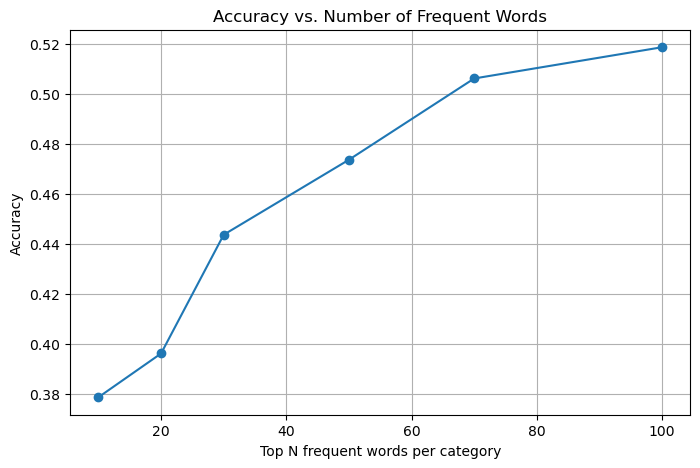

In [16]:
# Plot Accuracy vs. Number of Frequent Words
plt.figure(figsize=(8,5))
plt.plot([n for n, _ in results], [acc for _, acc in results], marker='o')
plt.title('Accuracy vs. Number of Frequent Words')
plt.xlabel('Top N frequent words per category')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()